## Rank Features of a Smartphone - Build a Python Application to Classify and Rank Dataset.

### Importing the Data Set 

### Attributes of mobile

battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Mega Bytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not

price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("MobileTrain.csv")
pd.set_option("display.max.columns", None)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df['clock_speed'] = df['clock_speed'].astype(int)
df['m_dep'] = df['m_dep'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  2000 non-null   int64
 1   blue           2000 non-null   int64
 2   clock_speed    2000 non-null   int32
 3   dual_sim       2000 non-null   int64
 4   fc             2000 non-null   int64
 5   four_g         2000 non-null   int64
 6   int_memory     2000 non-null   int64
 7   m_dep          2000 non-null   int32
 8   mobile_wt      2000 non-null   int64
 9   n_cores        2000 non-null   int64
 10  pc             2000 non-null   int64
 11  px_height      2000 non-null   int64
 12  px_width       2000 non-null   int64
 13  ram            2000 non-null   int64
 14  sc_h           2000 non-null   int64
 15  sc_w           2000 non-null   int64
 16  talk_time      2000 non-null   int64
 17  three_g        2000 non-null   int64
 18  touch_screen   2000 non-null   int64
 19  wifi  

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.5185,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.4950,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.0290,0.850600,0.0,0.00,1.0,2.00,3.0
dual_sim,2000.0,0.5095,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.3095,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.5215,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.0465,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.0530,0.224090,0.0,0.00,0.0,0.00,1.0
mobile_wt,2000.0,140.2490,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.5205,2.287837,1.0,3.00,4.0,7.00,8.0


### Missing Values Visualization

missingno module helps to visulaize the nan values in the dataset.Since it dont have null values so it not showing anything in the graph.

In [6]:
!pip install missingno

In [7]:
print (df.isnull().any())

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool


<AxesSubplot:>

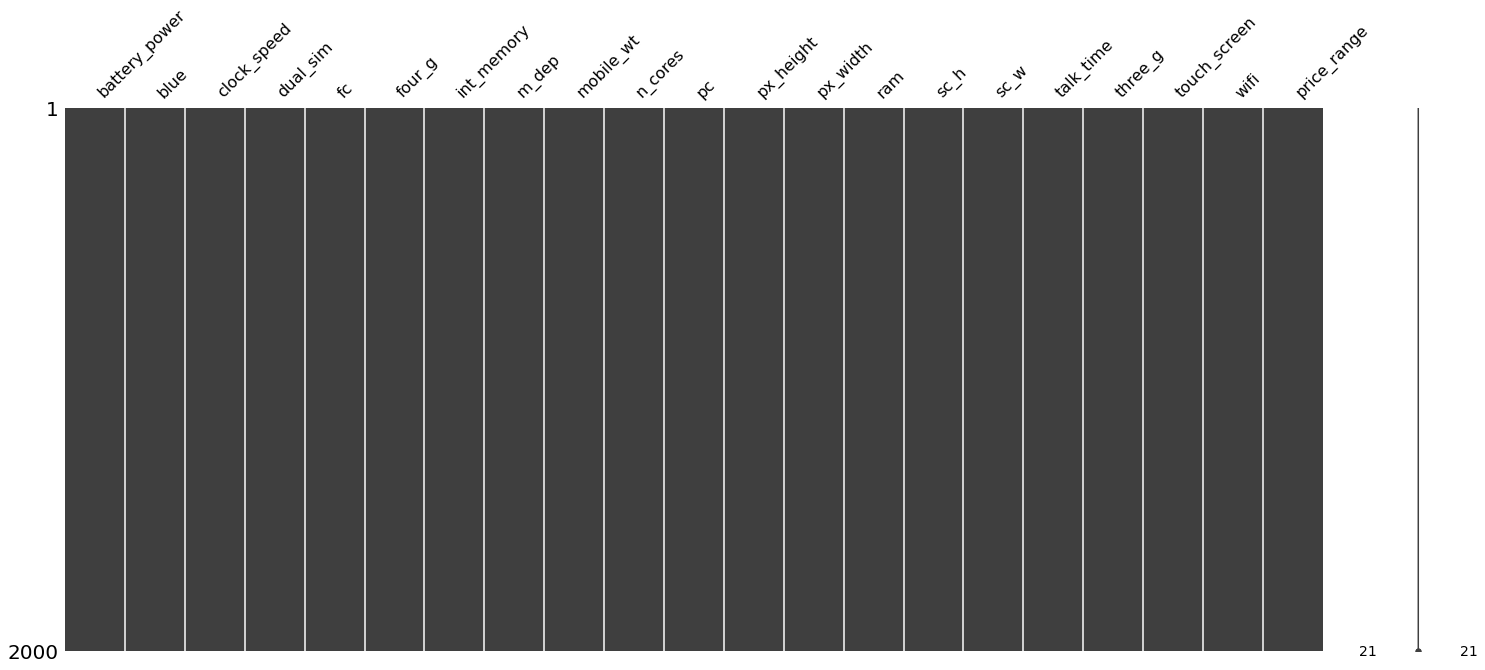

In [8]:
import missingno as msno

msno.matrix(df)

### Correlation matrix

In [9]:
correl = df.corr()
correl

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011113,-0.041847,0.033334,0.015665,-0.004004,0.023847,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.013277,0.035198,0.003593,0.013443,0.041177,0.042540,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011113,0.013277,1.000000,-0.014762,0.003935,-0.033247,0.007011,-0.008068,0.003349,0.014090,-0.008937,-0.004256,0.000046,0.015202,-0.019511,-0.002766,-0.004805,-0.034722,0.022139,-0.022822,0.006837
dual_sim,-0.041847,0.035198,-0.014762,1.000000,-0.029123,0.003187,-0.015679,-0.000031,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,0.003935,-0.029123,1.000000,-0.016560,-0.029133,0.030951,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.033247,0.003187,-0.016560,1.000000,0.008690,-0.014650,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.007011,-0.015679,-0.029133,0.008690,1.000000,0.005176,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.023847,0.042540,-0.008068,-0.000031,0.030951,-0.014650,0.005176,1.000000,0.002056,0.031055,0.027554,-0.025239,-0.034382,0.007241,-0.034169,-0.012453,-0.014776,0.001472,0.034290,0.001152,0.001996
mobile_wt,0.001844,-0.008605,0.003349,-0.008979,0.023618,-0.016537,-0.034214,0.002056,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,0.014090,-0.024658,-0.013356,-0.029706,-0.028310,0.031055,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

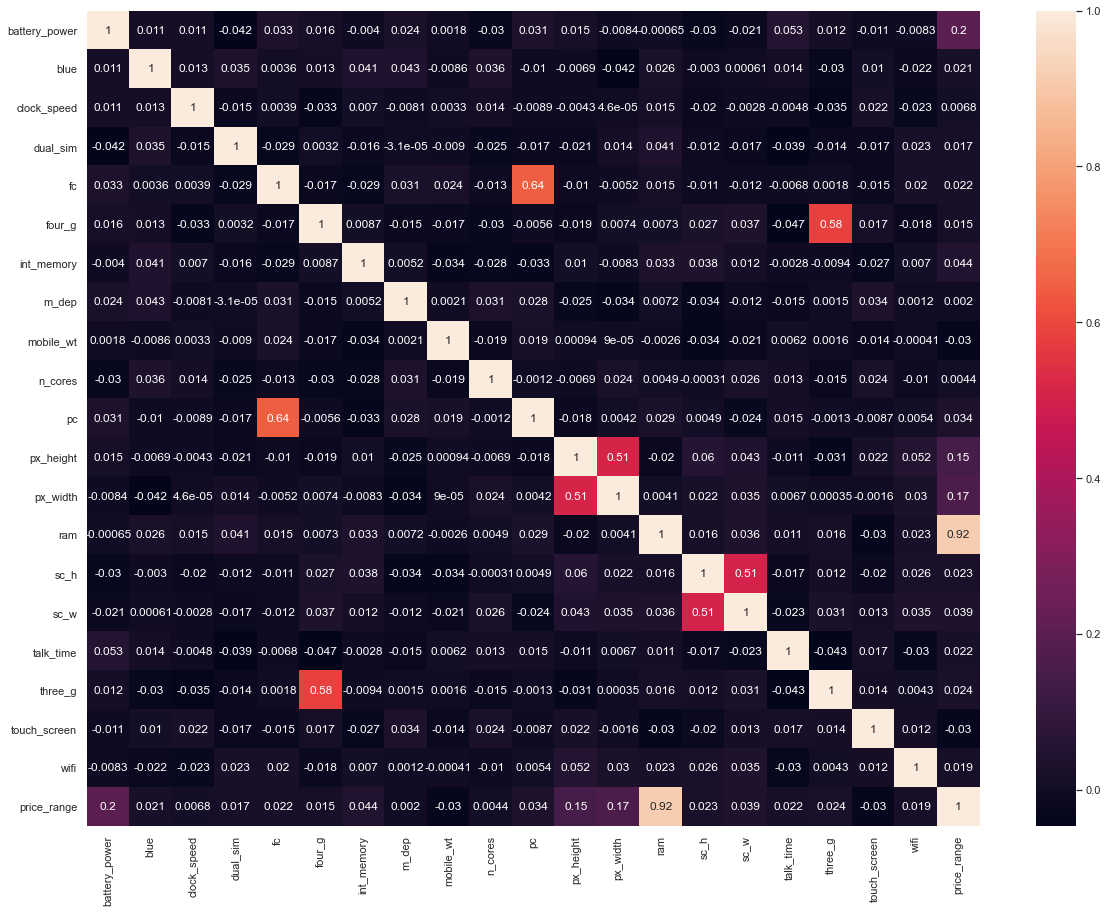

In [10]:
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(df.corr(),annot=True)

C:\Users\vishn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range'>

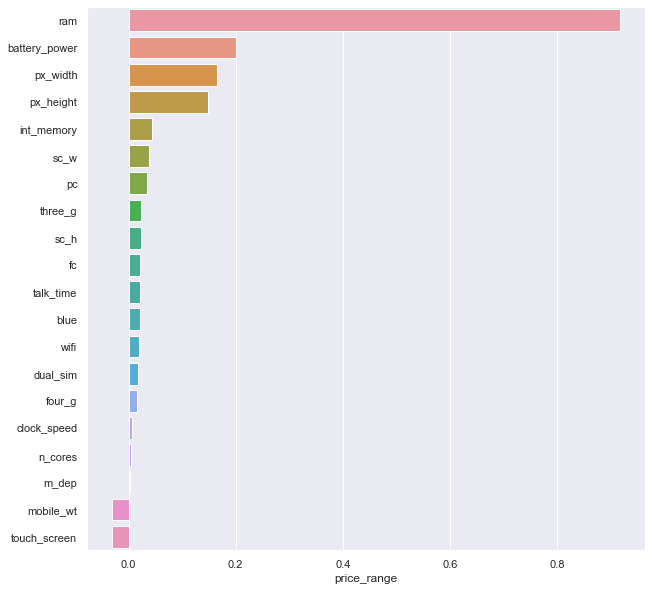

In [11]:
sns.set(rc = {'figure.figsize':(10,10)})
correlation = correl['price_range'].sort_values(ascending = False)
corrpric = correlation[1:]
sns.barplot(corrpric,corrpric.index)

This graph will helps to see the strong correlated features easily. Certain feature which have negative features which may be omitted based on model performance

### Data Visualization

C:\Users\vishn\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='price_range', ylabel='ram'>

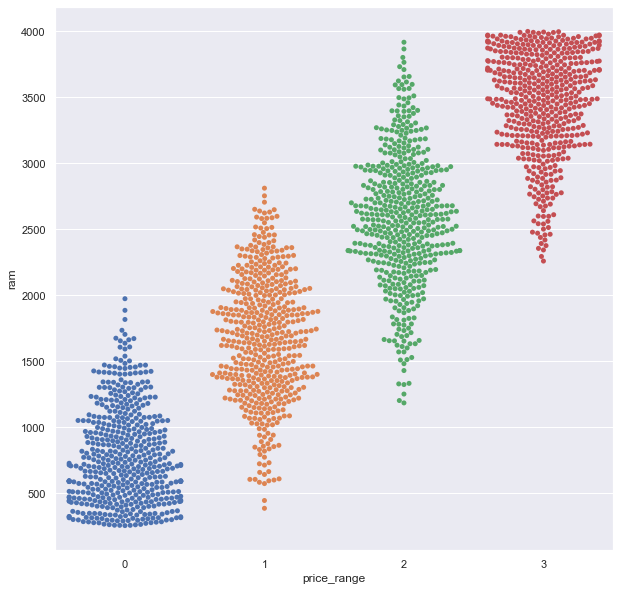

In [12]:
sns.swarmplot(x = "price_range",y = "ram",data =df)

In the mobile dataset ram has high correlation so i want to check the ram range for each price here swarm plot shows the range.For high price the ram is quite high

data exploration on features dual_sim, fc, four_g, three_g, wifi and touch screen

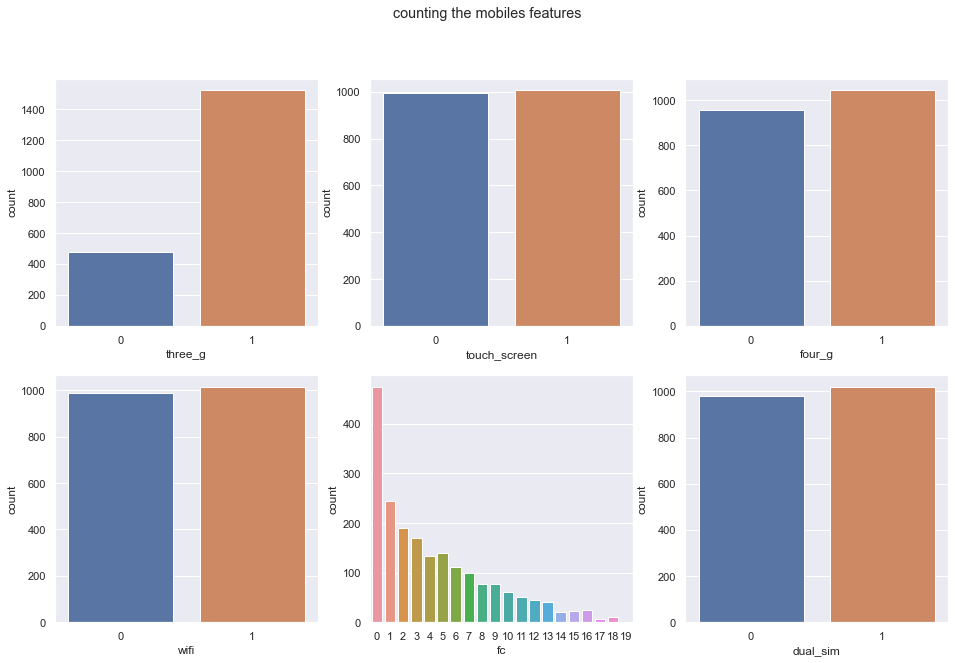

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig .suptitle("counting the mobiles features")
sns.countplot(ax=axes[0, 0], data=df, x='three_g')
sns.countplot(ax=axes[0, 1], data=df, x='touch_screen')
sns.countplot(ax=axes[0, 2], data=df, x='four_g')
sns.countplot(ax=axes[1,0], data=df, x='wifi')
sns.countplot(ax=axes[1,1],data = df, x ='fc' )
sns.countplot(ax=axes[1,2],data = df, x ='dual_sim' )

plt.show()

<AxesSubplot:xlabel='price_range', ylabel='count'>

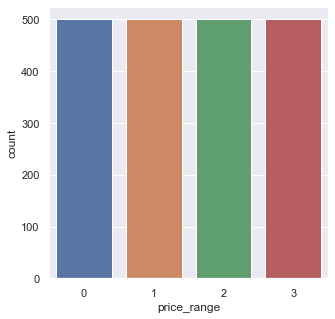

In [14]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.countplot(data = df, x ='price_range' )

C:\Users\vishn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vishn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vishn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

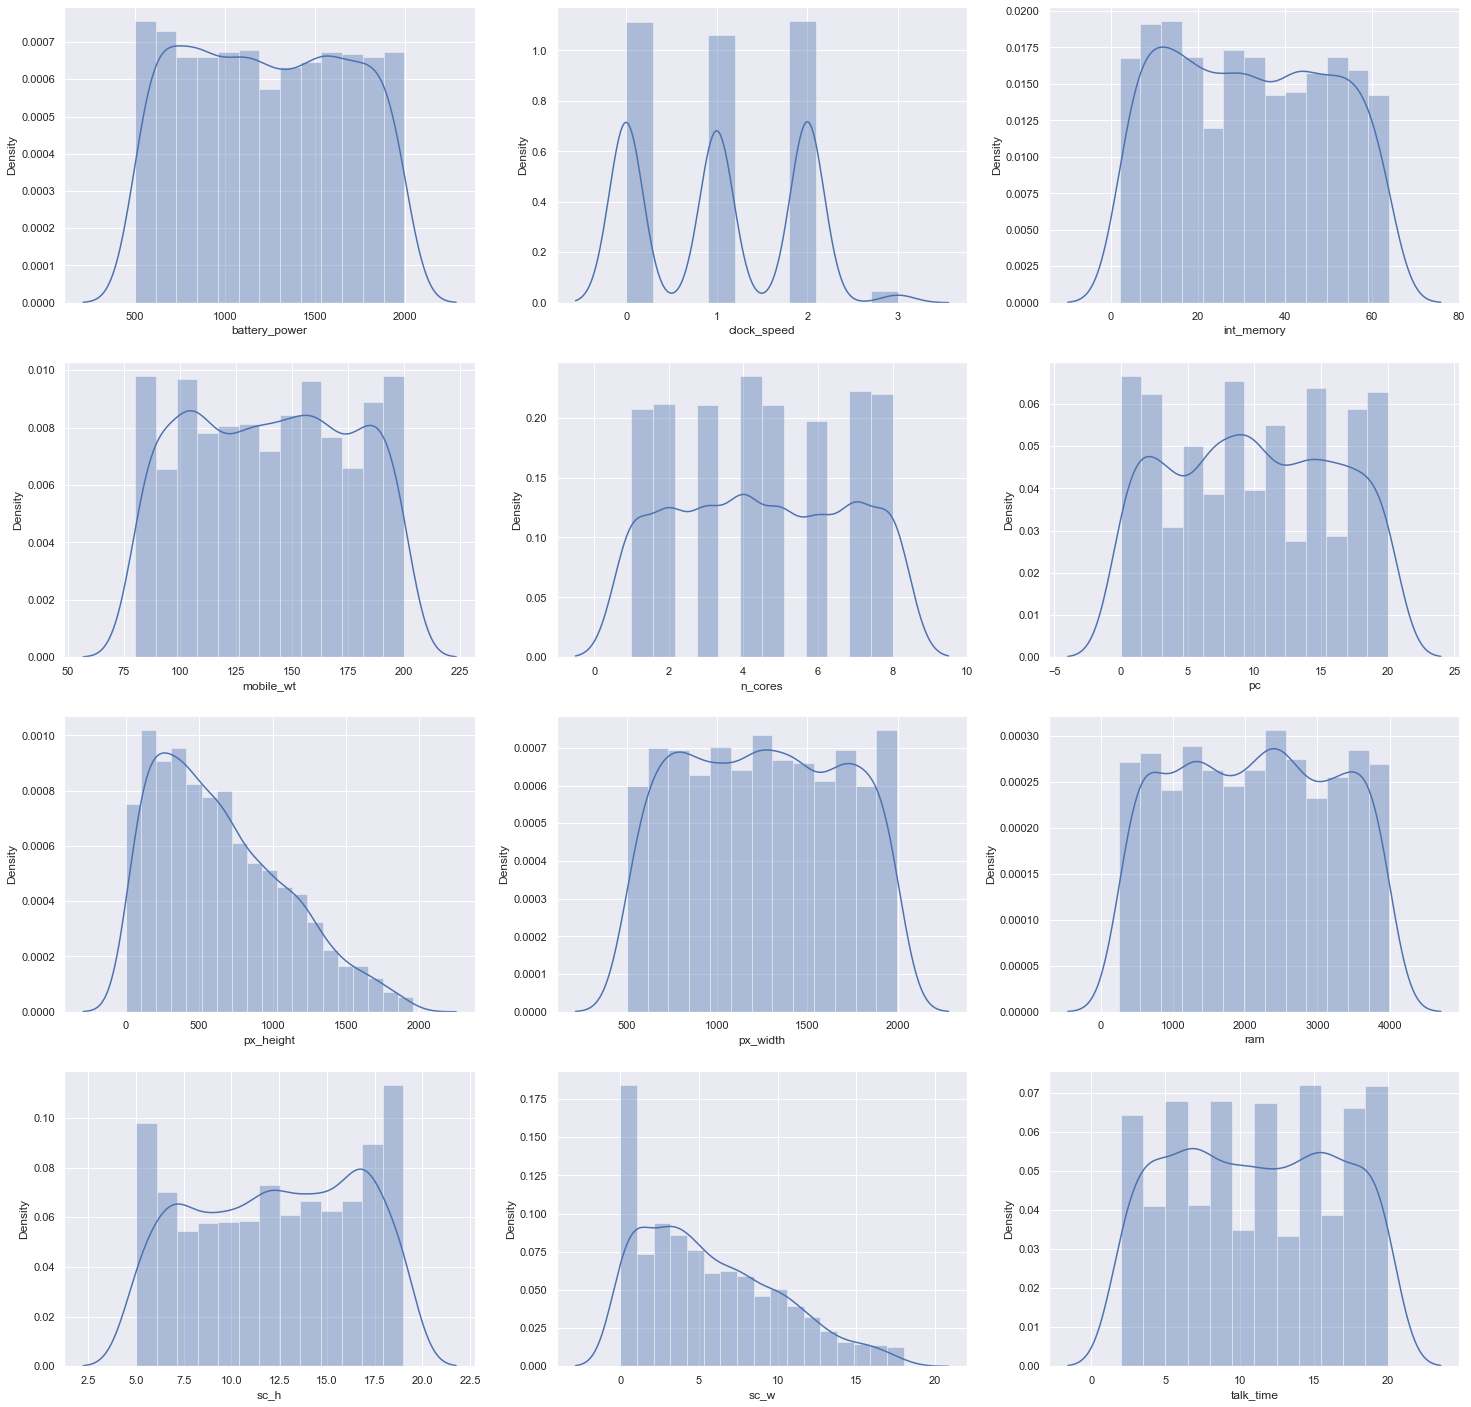

In [15]:
hist_plot = ["battery_power","clock_speed","int_memory","mobile_wt","n_cores","pc","px_height","px_width",
            "ram","sc_h","sc_w","talk_time","price_range"]

fig,ax = plt.subplots(4,3, figsize = (25,25) )

for i,j in zip(hist_plot,ax.flatten()):
    sns.distplot(df[i],ax = j)
plt.show();

### Outlier detection

Outliers are checked for continuous features in the dataset.

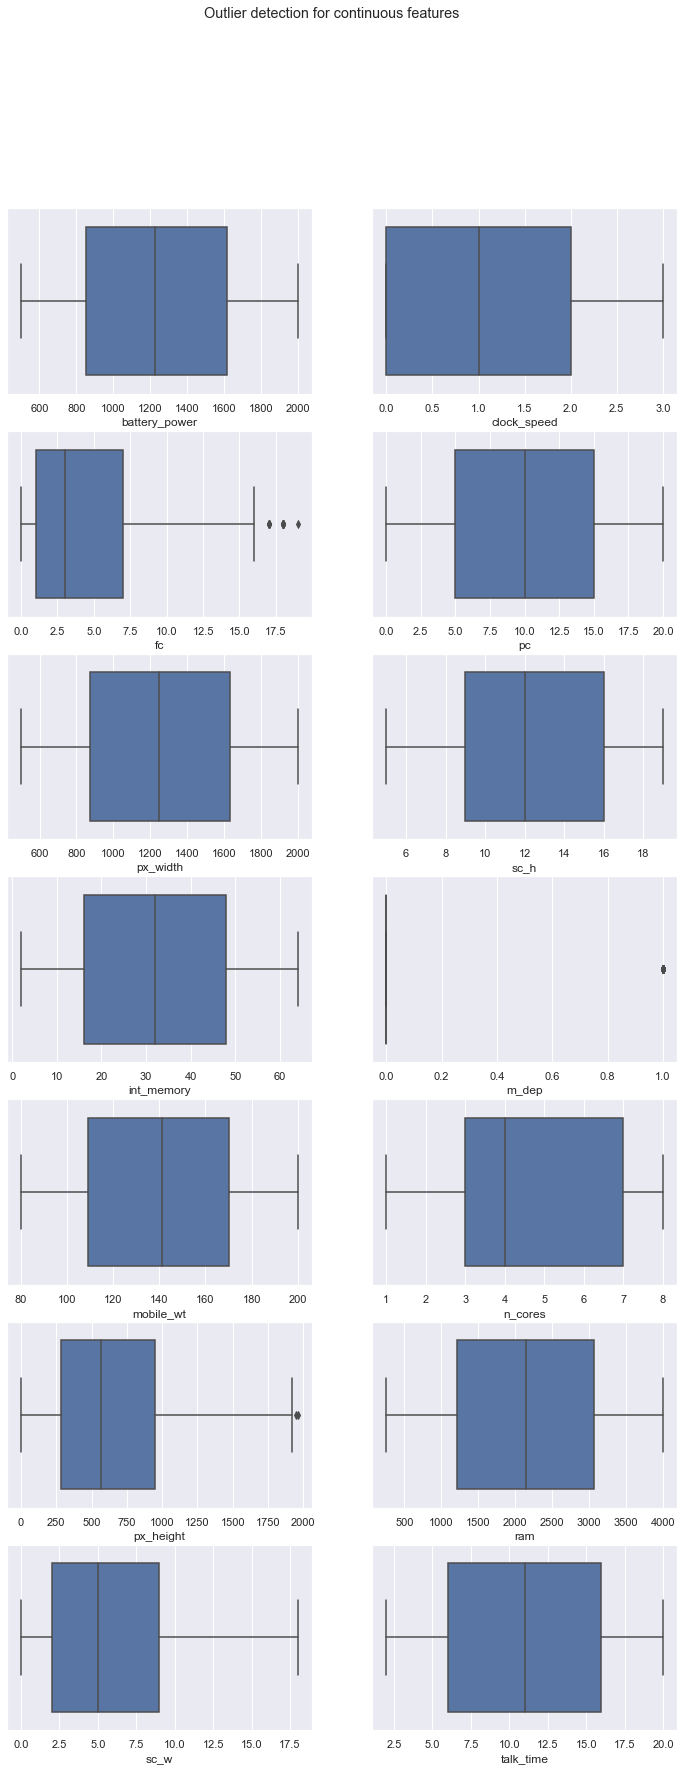

In [16]:
fig, ax = plt.subplots(ncols=2, nrows=7, figsize=(12,28))
fig .suptitle("Outlier detection for continuous features")
sns.boxplot(x=df['battery_power'],ax=ax[0,0])
sns.boxplot(x=df['clock_speed'],ax=ax[0,1])
sns.boxplot(x=df['fc'],ax=ax[1,0])
sns.boxplot(x=df['pc'],ax=ax[1,1])
sns.boxplot(x=df['px_width'],ax=ax[2,0])
sns.boxplot(x=df['sc_h'],ax=ax[2,1])
sns.boxplot(x=df['int_memory'],ax=ax[3,0])
sns.boxplot(x=df['m_dep'],ax=ax[3,1])
sns.boxplot(x=df['mobile_wt'],ax=ax[4,0])
sns.boxplot(x=df['n_cores'],ax=ax[4,1])
sns.boxplot(x=df['px_height'],ax=ax[5,0])
sns.boxplot(x=df['ram'],ax=ax[5,1])
sns.boxplot(x=df['sc_w'],ax=ax[6,0])
sns.boxplot(x=df['talk_time'],ax=ax[6,1])
plt.show()

There are few outliers in the dataset which are not considered here as outliers.

To check the distribution of plot and relationship of dataset we are plotting the pairplot.

### Importing the Test data 

In [17]:
df2 = pd.read_csv('MobileTest.csv')

### Splitting Data 

In [18]:
x = df.drop(columns = 'price_range').values
y = df.iloc[: , -1:].values

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


In [20]:
x_train

array([[ 833,    1,    0, ...,    1,    0,    1],
       [1424,    1,    2, ...,    1,    0,    0],
       [ 860,    1,    1, ...,    1,    1,    1],
       ...,
       [1190,    0,    2, ...,    0,    0,    1],
       [1191,    0,    2, ...,    1,    1,    1],
       [ 706,    0,    0, ...,    1,    0,    1]], dtype=int64)

### Feature Scaling 

In [21]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
scaling.fit_transform(x_train,y_train)

array([[-0.90893609,  1.01149463, -1.24781564, ...,  0.55534783,
        -0.98722446,  0.98159786],
       [ 0.42822183,  1.01149463,  1.11771164, ...,  0.55534783,
        -0.98722446, -1.01874713],
       [-0.84784765,  1.01149463, -0.065052  , ...,  0.55534783,
         1.01294087,  0.98159786],
       ...,
       [-0.10121125, -0.98863599,  1.11771164, ..., -1.80067327,
        -0.98722446,  0.98159786],
       [-0.09894872, -0.98863599,  1.11771164, ...,  0.55534783,
         1.01294087,  0.98159786],
       [-1.19627797, -0.98863599, -1.24781564, ...,  0.55534783,
        -0.98722446,  0.98159786]])

### Modelling 

### Decision Tree
Decision tree is a type of supervised learning algorithm that can be used for both regression and classification problems. The algorithm uses training data to create rules that can be represented by a tree structure. Like any other tree representation, it has a root node, internal nodes, and leaf nodes.

In [22]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=0,max_depth = 10)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

0.9971428571428571

In [23]:
y_pred = dt.predict(x_test)

Confusion matrices are used to visualize important predictive analytics like recall, specificity, accuracy, and precision. Confusion matrices are useful because they give direct comparisons of values like True Positives, False Positives, True Negatives and False Negatives.

In [24]:
dtc = confusion_matrix(y_test, y_pred)
dtc

array([[142,   9,   0,   0],
       [ 13, 108,  14,   0],
       [  0,  16, 116,  19],
       [  0,   0,  21, 142]], dtype=int64)

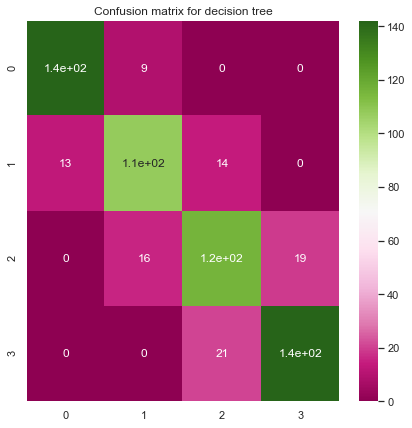

In [25]:
sns.set(rc = {'figure.figsize':(7,7)})
sns.heatmap(dtc, annot=True,cmap="PiYG")
plt.title("Confusion matrix for decision tree")
plt.show()

In [26]:
resultdt = classification_report(y_test,y_pred)

# print the result
print(resultdt)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       151
           1       0.81      0.80      0.81       135
           2       0.77      0.77      0.77       151
           3       0.88      0.87      0.88       163

    accuracy                           0.85       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.85      0.85      0.85       600



In [27]:
import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)
from sklearn.model_selection import cross_validate
#model = VotingRegressor
crossval = cross_validate(dt, x, y, cv=10, scoring = "r2" , return_train_score=True)
crossval['test_score'].mean(), crossval['train_score'].mean()

(0.8764000000000001, 0.9949333333333333)

### Logistic Regression

Logistic Regression is a “Supervised machine learning” algorithm that can be used to model the probability of a certain class or event. It is used when the data is linearly separable and the outcome is binary or dichotomous in nature.

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=2)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

C:\Users\vishn\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vishn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6364285714285715

In [29]:
y_pred = lr.predict(x_test)

In [30]:
lrc = confusion_matrix(y_test, y_pred)
lrc

array([[123,  26,   2,   0],
       [ 23,  71,  34,   7],
       [  0,  37,  68,  46],
       [  0,   2,  44, 117]], dtype=int64)

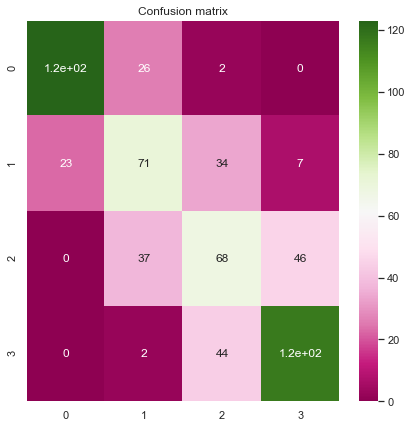

In [31]:
sns.set(rc = {'figure.figsize':(7,7)})
sns.heatmap(lrc, annot=True,cmap="PiYG")
plt.title("Confusion matrix")
plt.show()

In [32]:
resultlr = classification_report(y_test,y_pred)

# print the result
print(resultlr)

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       151
           1       0.52      0.53      0.52       135
           2       0.46      0.45      0.45       151
           3       0.69      0.72      0.70       163

    accuracy                           0.63       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.63      0.63      0.63       600



In [33]:
import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)
from sklearn.model_selection import cross_validate
#model = VotingRegressor
crossval = cross_validate(lr, x, y, cv=10, scoring = "r2" , return_train_score=True)
crossval['test_score'].mean(), crossval['train_score'].mean()

C:\Users\vishn\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vishn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vishn\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

(0.6592, 0.6631111111111111)

### Random forest

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset."

In [34]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(max_depth=10, random_state=0)
random.fit(x_train, y_train)
random.score(x_train, y_train)

<ipython-input-34-341f59b49fe6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random.fit(x_train, y_train)


0.9992857142857143

In [35]:
y_pred = random.predict(x_test)

In [36]:
rfc = confusion_matrix(y_test, y_pred)
rfc

array([[147,   4,   0,   0],
       [ 11, 106,  18,   0],
       [  0,  23, 116,  12],
       [  0,   0,  11, 152]], dtype=int64)

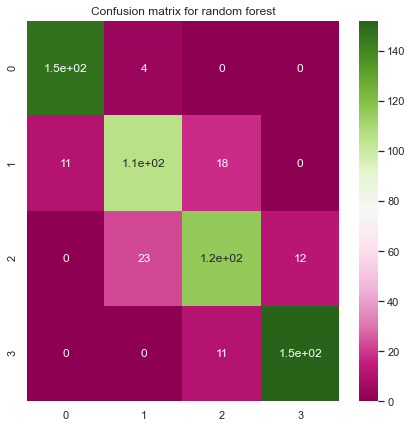

In [37]:
sns.set(rc = {'figure.figsize':(7,7)})
sns.heatmap(rfc, annot=True,cmap="PiYG")

plt.title("Confusion matrix for random forest")
plt.show()

In [38]:
resultrandom = classification_report(y_test,y_pred)
print(resultrandom)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       151
           1       0.80      0.79      0.79       135
           2       0.80      0.77      0.78       151
           3       0.93      0.93      0.93       163

    accuracy                           0.87       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.87      0.87      0.87       600



In [39]:
import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)
from sklearn.model_selection import cross_validate
#model = VotingRegressor
crossval = cross_validate(random, x, y, cv=10, scoring = "r2" , return_train_score=True)
crossval['test_score'].mean(), crossval['train_score'].mean()

C:\Users\vishn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\vishn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\vishn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\vishn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

(0.9112000000000002, 0.9986666666666666)

### K Nearest Neighbors Classifier

The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. It's easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

<ipython-input-40-b5b6ed448fc6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)


0.9378571428571428

In [41]:
knn.score(x_test,y_test)

0.9416666666666667

In [42]:
y_pred = knn.predict(x_test)

In [43]:
knnc = confusion_matrix(y_test, y_pred)
knnc

array([[150,   1,   0,   0],
       [  7, 125,   3,   0],
       [  0,   6, 135,  10],
       [  0,   0,   8, 155]], dtype=int64)

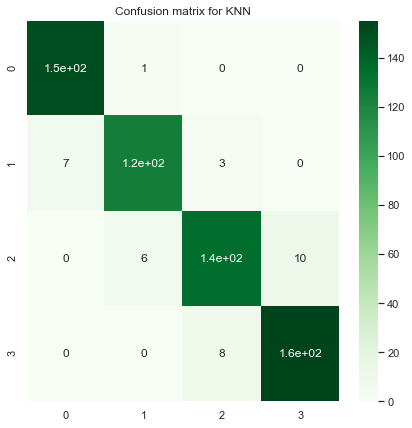

In [44]:
sns.set(rc = {'figure.figsize':(7,7)})
sns.heatmap(knnc, annot=True,cmap = 'Greens')
plt.title("Confusion matrix for KNN")
plt.show()

In [45]:
resultknn = classification_report(y_test,y_pred)
print(resultknn)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       151
           1       0.95      0.93      0.94       135
           2       0.92      0.89      0.91       151
           3       0.94      0.95      0.95       163

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



In [46]:
import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)
from sklearn.model_selection import cross_validate

crossval = cross_validate(knn, x, y, cv=10, scoring = "r2" , return_train_score=True)
crossval['test_score'].mean(), crossval['train_score'].mean()

C:\Users\vishn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\vishn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\vishn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\vishn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

(0.9452, 0.9598222222222221)

In [47]:
import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)
from sklearn.model_selection import cross_validate
#model = VotingRegressor
crossval = cross_validate(knn,x, y, cv=10, scoring = "r2" , return_train_score=True)
crossval['test_score'].mean(), crossval['train_score'].mean()

C:\Users\vishn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\vishn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\vishn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\vishn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

(0.9452, 0.9598222222222221)

### XG boost classifier

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.

In [48]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)

C:\Users\vishn\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\vishn\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[16:37:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


1.0

In [49]:
y_pred = xgb.predict(x_test)

In [50]:
xgbc = confusion_matrix(y_test, y_pred)
xgbc

array([[149,   2,   0,   0],
       [  6, 122,   7,   0],
       [  0,   9, 130,  12],
       [  0,   0,  10, 153]], dtype=int64)

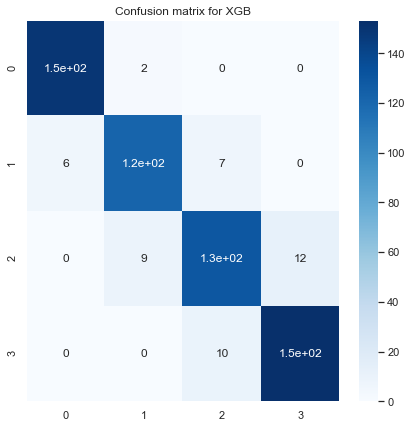

In [51]:
sns.set(rc = {'figure.figsize':(7,7)})
sns.heatmap(xgbc, annot=True,cmap ="Blues")
plt.title("Confusion matrix for XGB")
plt.show()

In [52]:
resultxgb = classification_report(y_test,y_pred)

# print the result
print(resultxgb)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       151
           1       0.92      0.90      0.91       135
           2       0.88      0.86      0.87       151
           3       0.93      0.94      0.93       163

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



### Hyper parameter tuning
Repeated k-fold cross-validation provides a way to improve the estimated performance of a machine learning model. This involves simply repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs

GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters

### Knn tuning 

In [53]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cvalidation = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cvalidation, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.926429 using {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
0.896905 (0.023085) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.896905 (0.023085) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.906429 (0.021693) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.910476 (0.022492) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.917143 (0.021946) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.919762 (0.020007) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.925238 (0.019926) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.925952 (0.022397) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.925000 (0.018785) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.923095 (0.019138) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.920238

C:\Users\vishn\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


### Logistic regression hypertuning

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

All models train score is high but test score is low. So models considered as over fitted model.

## Ranking

### Ranking According to Price Range 

In [ ]:
df["rank_by_price"] = df["price_range"].rank()
dt1 = df
dt1.head()

In [ ]:
dt1["rank_by_price"] = dt1["rank_by_price"].sort_values()
dt1

### Sorting Ranking Dataset 

In [ ]:
dt1.sort_values(by=["rank_by_price"])

In [ ]:
dt1.head()

### Ranking on all the features using rank()

In [ ]:
dt2 = pd.read_csv(r"MobileTrain.csv")
RankedDataset1 = dt2.rank()
RankedDataset1.sort_values(by="price_range")

### Ranking all the features separately to correct output

In [ ]:
b = dt2
b["rank_by_price"] = b["price_range"].rank()
b["rank_by_battery"] = b["battery_power"].rank(ascending=False)
b["rank_by_blueooth"] = b["blue"].rank(ascending=False)
b["rank_by_clockspeed"] = b["clock_speed"].rank(ascending=False)
b["rank_by_DualSIM"] = b["dual_sim"].rank(ascending=False)
b["rank_by_fc"] = b["fc"].rank(ascending=False)
b["rank_by_4G"] = b["four_g"].rank(ascending=False)
b["rank_by_InternalMemory"] = b["int_memory"].rank(ascending=False)
b["rank_by_mdep"] = b["m_dep"].rank(ascending=False)
b["rank_by_weight"] = b["mobile_wt"].rank(ascending=True)
b["rank_by_ncores"] = b["n_cores"].rank(ascending=False)
b["rank_by_pc"] = b["pc"].rank(ascending=False)
b["rank_by_height"] = b["px_height"].rank(ascending=False)
b["rank_by_width"] = b["px_width"].rank(ascending=False)
b["rank_by_ram"] = b["ram"].rank(ascending=False)
b["rank_by_sch"] = b["sc_h"].rank(ascending=False)
b["rank_by_scw"] = b["sc_w"].rank(ascending=False)
b["rank_by_talktime"] = b["talk_time"].rank(ascending=False)
b["rank_by_3G"] = b["three_g"].rank(ascending=False)
b["rank_by_touchscreen"] = b["touch_screen"].rank(ascending=False)
b["rank_by_wifi"] = b["wifi"].rank(ascending=False)
b.head()

In [ ]:
RankedDataset2 = b.iloc[:,21:]
RankedDataset2